In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
matplotlib.rcParams.update(params)
cmap = matplotlib.colormaps['tab10']

## Data

### Import Data

In [3]:
df = pd.read_csv('../data/summary.csv')
df.head()

,discharge_date,n_discharges,avg_discharge_time,percent_discharge_before_14,percent_discharge_before_13,percent_discharge_before_12,percent_discharge_before_11,weekday,n_md_staff,n_app_staff,...,avg_bed_wait_time,percent_bed_wait_less_30_min,percent_bed_wait_less_1_hr,percent_bed_wait_less_2_hr,percent_home_floor,percent_service_A,percent_service_B,avg_discharge_before_13,avg_discharge_before_12,avg_discharge_before_11
0,01-01-2023,22,12.500000,0.727273,0.545455,0.272727,0.045455,6.0,3,6,...,64.319697,0.363636,0.454545,0.818182,0.454545,0.727273,0.272727,1,0,0
1,01-01-2024,10,11.500000,1.000000,0.700000,0.600000,0.100000,0.0,1,3,...,0.000000,1.000000,1.000000,1.000000,0.700000,0.400000,0.600000,1,1,0
2,01-01-2025,21,12.285714,0.714286,0.619048,0.523810,0.142857,2.0,4,6,...,0.000000,1.000000,1.000000,1.000000,0.476190,0.523810,0.476190,1,0,0
3,01-01-2026,17,12.058824,0.764706,0.588235,0.411765,0.235294,3.0,4,5,...,113.127451,0.294118,0.294118,0.352941,0.647059,0.647059,0.352941,1,0,0
4,01-01-2027,21,13.238095,0.523810,0.523810,0.190476,0.000000,4.0,2,5,...,100.665873,0.285714,0.333333,0.476190,0.333333,0.476190,0.523810,0,0,0


In [4]:
df.columns

Index(['discharge_date', 'n_discharges', 'avg_discharge_time',
       'percent_discharge_before_14', 'percent_discharge_before_13',
       'percent_discharge_before_12', 'percent_discharge_before_11', 'weekday',
       'n_md_staff', 'n_app_staff', 'n_nurse_staff', 'n_cm_staff',
       'n_pharm_staff', 'n_bed_staff', 'rounding_start', 'n_floor_adder',
       'rounding_mean_queue_length', 'perc_transport_cases',
       'perc_equipment_cases', 'perc_cm_cases', 'perc_cm_trans_cases',
       'perc_cm_equip_cases', 'perc_cm_trans_med_cases',
       'perc_cm_equip_med_cases', 'perc_cm_equip_trans_cases',
       'perc_cm_equip_trans_med_cases', 'avg_bed_wait_time',
       'percent_bed_wait_less_30_min', 'percent_bed_wait_less_1_hr',
       'percent_bed_wait_less_2_hr', 'percent_home_floor', 'percent_service_A',
       'percent_service_B', 'avg_discharge_before_13',
       'avg_discharge_before_12', 'avg_discharge_before_11'],
      dtype='object')

### Select Features

In [5]:
select_X_columns = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff', 'n_cm_staff', 
                    'n_pharm_staff', 'n_bed_staff', 'rounding_start', 
                    'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 
                    'perc_cm_trans_cases','perc_cm_equip_cases', 'perc_cm_trans_med_cases',
                    'perc_cm_equip_med_cases', 'perc_cm_equip_trans_cases','perc_cm_equip_trans_med_cases',
                    'percent_service_A', 'percent_service_B', 'percent_home_floor']

df[select_X_columns]

,n_discharges,n_md_staff,n_app_staff,n_nurse_staff,n_cm_staff,n_pharm_staff,n_bed_staff,rounding_start,perc_transport_cases,perc_equipment_cases,perc_cm_cases,perc_cm_trans_cases,perc_cm_equip_cases,perc_cm_trans_med_cases,perc_cm_equip_med_cases,perc_cm_equip_trans_cases,perc_cm_equip_trans_med_cases,percent_service_A,percent_service_B,percent_home_floor
0,22,3,6,8,4,3,3,480,0.045455,0.136364,0.227273,0.045455,0.136364,0.045455,0.090909,0.045455,0.045455,0.727273,0.272727,0.454545
1,10,1,3,10,0,3,3,450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000,0.700000
2,21,4,6,10,3,3,3,480,0.142857,0.095238,0.142857,0.142857,0.095238,0.095238,0.047619,0.095238,0.047619,0.523810,0.476190,0.476190
3,17,4,5,8,2,3,3,480,0.117647,0.058824,0.117647,0.117647,0.058824,0.000000,0.000000,0.058824,0.000000,0.647059,0.352941,0.647059
4,21,2,5,10,3,3,3,495,0.142857,0.047619,0.190476,0.142857,0.047619,0.095238,0.047619,0.047619,0.047619,0.476190,0.523810,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,20,1,3,10,3,3,3,465,0.150000,0.050000,0.250000,0.150000,0.050000,0.150000,0.050000,0.050000,0.050000,0.600000,0.400000,0.700000
3645,22,3,5,10,3,3,3,480,0.090909,0.045455,0.181818,0.090909,0.045455,0.000000,0.000000,0.045455,0.000000,0.590909,0.409091,0.590909
3646,25,2,2,11,4,3,4,465,0.120000,0.200000,0.320000,0.120000,0.200000,0.120000,0.200000,0.120000,0.120000,0.680000,0.320000,0.640000
3647,10,1,3,9,3,3,3,450,0.100000,0.100000,0.300000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.600000,0.400000,0.300000


In [6]:
select_y_column = ['avg_discharge_before_13']
df[select_y_column]

,avg_discharge_before_13
0,1
1,1
2,1
3,1
4,0
...,...
3644,0
3645,1
3646,0
3647,1


### Train Test Split

In [7]:
X = df[select_X_columns].to_numpy().astype(np.float32)
y = df[select_y_column].to_numpy().astype(np.float32)

In [8]:
X.shape

(3649, 20)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=123)

for train_index, test_index in sss.split(X,y):
    print(y[train_index].mean())
    print(y[test_index].mean())

0.6406821
0.6410959


In [10]:
X.shape

(3649, 20)

In [12]:
X_train, y_train = X[train_index], y[train_index]
X_test, y_test = X[test_index], y[test_index]

### Standardize Inputs

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build Inputs

In [15]:
def build_inputs(df, select_X_feature, select_y_feature, test_size=0.33, X_pad=20, scaler=None):
    
    # select X and y
    X = df.loc[:, select_X_feature].to_numpy().astype(np.float32)
    y = df.loc[:, select_y_feature].to_numpy().astype(np.float32)
    
    # pad inputs
    if X.shape[1]<X_pad:
        X = np.hstack([X, np.zeros((X.shape[0],X_pad-X.shape[1]), dtype=np.float32)])
    
    # train test split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=123)
    for train_index, test_index in sss.split(X,y):
        print(f" train class balance {y[train_index].mean()}")
        print(f" train class balance {y[test_index].mean()}")
    
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    # standardize
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(X)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # reshape y
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    # create 0 and 1 test
    X_test0 = X_test[y_test[:,0]==0, :]
    y_test0 = y_test[y_test[:,0]==0, :]
    X_test1 = X_test[y_test[:,0]==1, :]
    y_test1 = y_test[y_test[:,0]==1, :]
    
    return X_train, y_train, X_test, y_test, X_test0, y_test0, X_test1, y_test1, scaler

In [16]:
select_X_feature = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff', 'n_cm_staff', 
                    'n_pharm_staff', 'n_bed_staff', 'rounding_start', 
                    'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 
                    'perc_cm_trans_cases','perc_cm_equip_cases', 'perc_cm_trans_med_cases',
                    'perc_cm_equip_med_cases', 'perc_cm_equip_trans_cases','perc_cm_equip_trans_med_cases',
                    'percent_service_A', 'percent_service_B', 'percent_home_floor']
select_y_feature = ['avg_discharge_before_13']

X_train, y_train, X_test, y_test, X_test0, y_test0, X_test1, y_test1, scaler = build_inputs(df, select_X_feature, select_y_feature, test_size=0.33, X_pad=20)

 train class balance 0.6407528519630432
 train class balance 0.6406639218330383


## Model

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.filterwarnings("ignore")
torch.manual_seed(0)

### Build Model

In [18]:
def create_model(n_inputs, n_hidden_layers, n_hidden_nodes):
    
    # Create model
    model = nn.Sequential()
    # Add first first layer
    model.append(nn.Linear(n_inputs, n_hidden_nodes))
    model.append(nn.ReLU())

    # Add hidden layers
    for i in range(NUM_HIDDEN_LAYERS-1):
        model.append(nn.Linear(n_hidden_nodes, n_hidden_nodes))
        model.append(nn.ReLU())

    # Add output layers
    model.append(nn.Linear(NUM_HIDDEN_NODES, 1))
    model.append(nn.Sigmoid())

    # Initialize weights.
    for module in model.modules():
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.0)

    # Loss function and optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=.001) #torch.optim.Adam(model.parameters())
    loss_function = nn.BCELoss() #nn.MSELoss()

    return model, optimizer, loss_function

### Train Model

In [19]:
def train_model(model, loss_function, optimizer, trainset, testset, testset0, testset1, epochs, batch_size, threshold=0.5, verbose=False):
    
    # select GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Dataloaders
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)
    testloader0 = DataLoader(testset0, batch_size=batch_size, shuffle=False)
    testloader1 = DataLoader(testset1, batch_size=batch_size, shuffle=False)

    n_epoch_list, train_acc_list, test_acc_list, test0_acc_list, test1_acc_list = [], [], [], [], []

    # Iterate for N epochs
    for i in range(epochs):
        
        # Train
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_batches = 0
        for inputs, targets in trainloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            train_correct += (outputs.data.ge(threshold) == targets).sum().item()
            train_batches += 1
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_loss = train_loss / train_batches
        train_acc = train_correct / (train_batches * batch_size)
        if i%10==0:
            n_epoch_list.append(i)
            train_acc_list.append(train_acc)
        if verbose: print(f"Epoch {i} Training Loss {train_loss} Training Accuracy {train_acc}")
        if i==epochs-1:
            print(f"Epoch {i} Training Loss {train_loss} Training Accuracy {train_acc}")
        
        # Evaluate Testset
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_batches = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            test_correct += (outputs.data.ge(threshold) == targets).sum().item()
            test_batches += 1
            test_loss += loss.item()
    
        test_loss = test_loss / test_batches
        test_acc = test_correct / (test_batches * batch_size)
        if i%10==0:
            test_acc_list.append(test_acc)
        if verbose: print(f"Epoch {i} Test Loss {test_loss} Test Accuracy {test_acc}")
        if i==epochs-1:
            print(f"Epoch {i} Test Loss {test_loss} Test Accuracy {test_acc}")

        # Evaluate Testset0
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_batches = 0
        for inputs, targets in testloader0:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            test_correct += (outputs.data.ge(threshold) == targets).sum().item()
            test_batches += 1
            test_loss += loss.item()
    
        test_loss = test_loss / test_batches
        test_acc = test_correct / (test_batches * batch_size)
        if i%10==0:
            test0_acc_list.append(test_acc)
        if verbose: print(f"Epoch {i} Test0 Loss {test_loss} Test0 Accuracy {test_acc}")
        if i==epochs-1:
            print(f"Epoch {i} Test0 Loss {test_loss} Test0 Accuracy {test_acc}")

        # Evaluate Testset1
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_batches = 0
        for inputs, targets in testloader1:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            test_correct += (outputs.data.ge(threshold) == targets).sum().item()
            test_batches += 1
            test_loss += loss.item()
    
        test_loss = test_loss / test_batches
        test_acc = test_correct / (test_batches * batch_size)
        if i%10==0:
            test1_acc_list.append(test_acc)
        if verbose: print(f"Epoch {i} Test1 Loss {test_loss} Test1 Accuracy {test_acc}")
        if i==epochs-1:
            print(f"Epoch {i} Test1 Loss {test_loss} Test1 Accuracy {test_acc}")
        
    return n_epoch_list, train_acc_list, test_acc_list, test0_acc_list, test1_acc_list

## Train

--------------------------------------------------
case1
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.25246181760160047 Training Accuracy 0.8918795620437956
Epoch 200 Test Loss 0.2885794232757202 Test Accuracy 0.8743169398907104
Epoch 200 Test0 Loss 0.4856134125059753 Test0 Accuracy 0.7651515151515151
Epoch 200 Test1 Loss 0.17615647602858198 Test1 Accuracy 0.9358974358974359


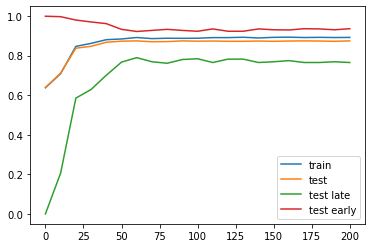

--------------------------------------------------
case2
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.23268403395004297 Training Accuracy 0.9005474452554745
Epoch 200 Test Loss 0.28520703605055564 Test Accuracy 0.8743169398907104
Epoch 200 Test0 Loss 0.4622348692042358 Test0 Accuracy 0.7765151515151515
Epoch 200 Test1 Loss 0.18490089258401948 Test1 Accuracy 0.9294871794871795


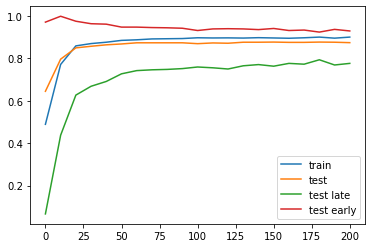

--------------------------------------------------
case3
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.21261724198991636 Training Accuracy 0.9092153284671532
Epoch 200 Test Loss 0.29557634184971615 Test Accuracy 0.8756830601092896
Epoch 200 Test0 Loss 0.4472899547157188 Test0 Accuracy 0.803030303030303
Epoch 200 Test1 Loss 0.20842870987123913 Test1 Accuracy 0.9166666666666666


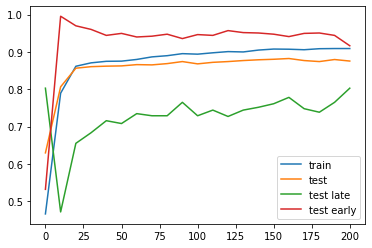

--------------------------------------------------
case4
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.1362567196369008 Training Accuracy 0.9452554744525548
Epoch 200 Test Loss 0.24644292651268823 Test Accuracy 0.9016393442622951
Epoch 200 Test0 Loss 0.40442120886732347 Test0 Accuracy 0.8352272727272727
Epoch 200 Test1 Loss 0.1562805059512691 Test1 Accuracy 0.9391025641025641


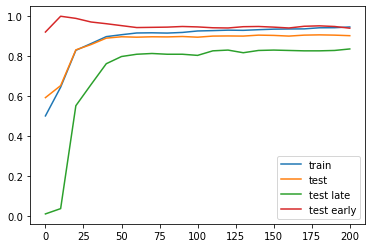

--------------------------------------------------
case4b
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.10330163718196546 Training Accuracy 0.9571167883211679
Epoch 200 Test Loss 0.18954310729406912 Test Accuracy 0.9241803278688525
Epoch 200 Test0 Loss 0.32102867248150607 Test0 Accuracy 0.8693181818181818
Epoch 200 Test1 Loss 0.11411100478482664 Test1 Accuracy 0.9551282051282052


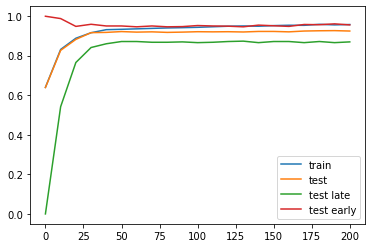

--------------------------------------------------
case5
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.13157519100261103 Training Accuracy 0.9443430656934306
Epoch 200 Test Loss 0.24267853463776 Test Accuracy 0.894808743169399
Epoch 200 Test0 Loss 0.3965308098545806 Test0 Accuracy 0.8295454545454546
Epoch 200 Test1 Loss 0.15507700017147943 Test1 Accuracy 0.9316239316239316


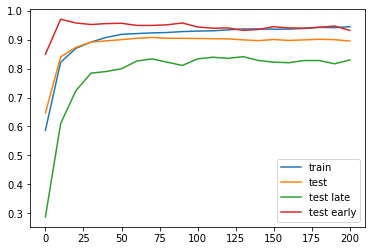

--------------------------------------------------
case6
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.10797890685039851 Training Accuracy 0.9571167883211679
Epoch 200 Test Loss 0.27927681590386544 Test Accuracy 0.8900273224043715
Epoch 200 Test0 Loss 0.445326412078099 Test0 Accuracy 0.821969696969697
Epoch 200 Test1 Loss 0.1836506854553715 Test1 Accuracy 0.9284188034188035


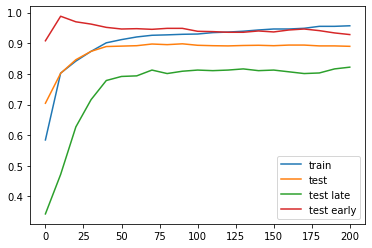

--------------------------------------------------
case7
 train class balance 0.6409319043159485
 train class balance 0.6404109597206116
Epoch 200 Training Loss 0.10622898922374058 Training Accuracy 0.9552919708029197
Epoch 200 Test Loss 0.272997987986055 Test Accuracy 0.894808743169399
Epoch 200 Test0 Loss 0.48833433498855977 Test0 Accuracy 0.8106060606060606
Epoch 200 Test1 Loss 0.15091866081004413 Test1 Accuracy 0.9423076923076923


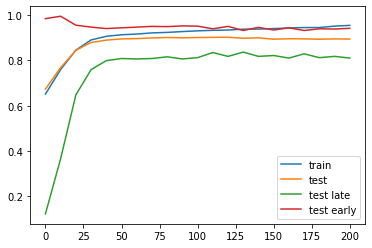

In [44]:
select_X_columns={ 

    'case1':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff'],
    
    'case2':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff'],

    'case3':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff', 
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff', 
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases'],

    'case4':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start'],
    
    'case4b':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start',
             'percent_discharge_before_13'],

    'case5':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start',
            'percent_home_floor'],
    
    'case6':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start',
            'percent_home_floor',
             'perc_cm_trans_cases','perc_cm_equip_cases', 'perc_cm_trans_med_cases',
                    'perc_cm_equip_med_cases'],
    
    'case7':['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start',
            'percent_home_floor',
             'perc_cm_trans_cases','perc_cm_equip_cases', 'perc_cm_trans_med_cases',
                    'perc_cm_equip_med_cases', 'perc_cm_equip_trans_cases','perc_cm_equip_trans_med_cases']
}

select_y_column = ['avg_discharge_before_13']

for case_ in select_X_columns.keys():
    print("-"*50)
    print(case_)
    
    # select X features
    X_features = select_X_columns[case_]
    
    # build input
    X_train, y_train, X_test, y_test, X_test0, y_test0, X_test1, y_test1, scaler = build_inputs(df, X_features, select_y_column, test_size=0.4, X_pad=20)

    trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    testset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
    testset0 = TensorDataset(torch.from_numpy(X_test0), torch.from_numpy(y_test0))
    testset1 = TensorDataset(torch.from_numpy(X_test1), torch.from_numpy(y_test1))

    # build model
    NUM_INPUTS = X_train.shape[1]
    NUM_HIDDEN_LAYERS = 5
    NUM_HIDDEN_NODES = 40

    model, optimizer, loss_function = create_model(n_inputs=NUM_INPUTS, n_hidden_layers=NUM_HIDDEN_LAYERS, n_hidden_nodes=NUM_HIDDEN_NODES)
    model

    # training param
    epochs = 201
    batch_size = 8
    threshold = 0.5
    n_epoch_list, train_acc_list, test_acc_list, test0_acc_list ,test1_acc_list  = train_model(model, loss_function, optimizer, trainset, testset, testset0, testset1, epochs, batch_size, threshold, verbose=False)
    plt.plot(n_epoch_list, train_acc_list, label='train') 
    plt.plot(n_epoch_list, test_acc_list, label='test')
    plt.plot(n_epoch_list, test0_acc_list, label='test late')
    plt.plot(n_epoch_list, test1_acc_list, label='test early')
    plt.legend()
    plt.show()

### Best Case

In [45]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']


X_train, y_train, X_test, y_test, X_test0, y_test0, X_test1, y_test1, scaler = build_inputs(df, X_features, y_feature, test_size=0.1, X_pad=20)

trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
testset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

# build model
NUM_INPUTS = X_train.shape[1]
NUM_HIDDEN_LAYERS = 5
NUM_HIDDEN_NODES = 40

model, optimizer, loss_function = create_model(n_inputs=NUM_INPUTS, n_hidden_layers=NUM_HIDDEN_LAYERS, n_hidden_nodes=NUM_HIDDEN_NODES)
model

# select GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# training param
epochs = 301
batch_size = 8
threshold = 0.5
verbose=False


# Dataloaders
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)
    

n_epoch_list, train_acc_list, test_acc_list, test_pred_list = [], [], [], []

# Iterate for N epochs
for i in range(epochs):

    # Train
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_batches = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        train_correct += (outputs.data.ge(threshold) == targets).sum().item()
        train_batches += 1
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / train_batches
    train_acc = train_correct / (train_batches * batch_size)
    if i%10==0:
        n_epoch_list.append(i)
        train_acc_list.append(train_acc)
    if verbose: print(f"Epoch {i} Training Loss {train_loss} Training Accuracy {train_acc}")
    if i==epochs-1:
        print(f"Epoch {i} Training Loss {train_loss} Training Accuracy {train_acc}")

    # Evaluate Testset
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_batches = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        test_correct += (outputs.data.ge(threshold) == targets).sum().item()
        test_batches += 1
        test_loss += loss.item()

    test_loss = test_loss / test_batches
    test_acc = test_correct / (test_batches * batch_size)
    if i%10==0:
        test_acc_list.append(test_acc)
    if verbose: print(f"Epoch {i} Test Loss {test_loss} Test Accuracy {test_acc}")
    if i==epochs-1:
        print(f"Epoch {i} Test Loss {test_loss} Test Accuracy {test_acc}")

 train class balance 0.6406821012496948
 train class balance 0.6410958766937256
Epoch 500 Training Loss 0.0877908610854167 Training Accuracy 0.9677615571776156
Epoch 500 Test Loss 0.4015279054061545 Test Accuracy 0.8586956521739131


## Inference

In [46]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']

X_eval, y_eval, X_, y_, X_0, y_0, X_1, y_1,_ = build_inputs(df, X_features, y_feature, test_size=0.001, X_pad=20, scaler=scaler)

print(f"Data {y_eval.mean()}")
outputs = model(torch.from_numpy(X_eval))
print(f"Model Prediction {outputs.ge(threshold).numpy().mean()}")
targets = torch.from_numpy(y_eval)
accuracy = (outputs.data.ge(threshold) == targets).sum()/targets.shape[0]
print(f"Model Accuracy {accuracy}")

 train class balance 0.6406035423278809
 train class balance 0.75
Data 0.6406035423278809
Model Prediction 0.6883401920438957
Model Accuracy 0.9423868060112


<AxesSubplot:>

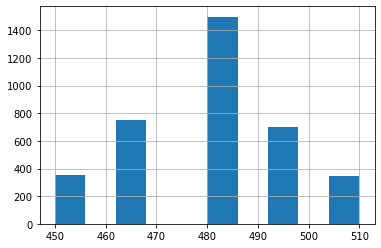

In [47]:
df.rounding_start.hist(bins=10)

In [48]:
bins = [400, 450, 465, 480, 495, 510]
df['binned'] = pd.cut(df['rounding_start'], bins, labels=['1','2','3','4','5'])

In [49]:
df.binned

0       3
1       1
2       3
3       3
4       4
       ..
3644    2
3645    3
3646    2
3647    1
3648    3
Name: binned, Length: 3649, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']

In [50]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']

trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))


for bin_, g in df.groupby('binned'):
    print(bin_)
    X_test = g[X_features]
    y_test = g[y_feature]
    X_eval, y_eval, X_, y_, X_0, y_0, X_1, y_1,_ = build_inputs(g, X_features, y_feature, test_size=0.1, X_pad=20, scaler=scaler)
    print(f"bin {bin_} Data {y_.mean()}")
    outputs = model(torch.from_numpy(X_))
    print(f"bin {bin_} Model Prediction {outputs.ge(threshold).numpy().mean()}")
    targets = torch.from_numpy(y_)
    accuracy = (outputs.data.ge(threshold) == targets).sum()/targets.shape[0]
    print(f"bin {bin_} Model Accuracy {accuracy}")

1
 train class balance 0.35555556416511536
 train class balance 0.3611111044883728
bin 1 Data 0.3611111044883728
bin 1 Model Prediction 0.3611111111111111
bin 1 Model Accuracy 1.0
2
 train class balance 0.22962963581085205
 train class balance 0.2368421107530594
bin 2 Data 0.2368421107530594
bin 2 Model Prediction 0.23684210526315788
bin 2 Model Accuracy 1.0
3
 train class balance 0.8969607353210449
 train class balance 0.8999999761581421
bin 3 Data 0.8999999761581421
bin 3 Model Prediction 0.94
bin 3 Model Accuracy 0.9599999785423279
4
 train class balance 0.7313195466995239
 train class balance 0.7285714149475098
bin 4 Data 0.7285714149475098
bin 4 Model Prediction 0.8285714285714286
bin 4 Model Accuracy 0.8999999761581421
5
 train class balance 0.5286624431610107
 train class balance 0.5142857432365417
bin 5 Data 0.5142857432365417
bin 5 Model Prediction 0.6285714285714286
bin 5 Model Accuracy 0.8857142925262451


#### MDs

<AxesSubplot:>

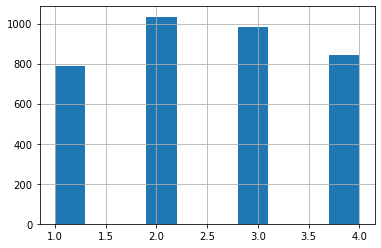

In [51]:
df.n_md_staff.hist(bins=10)

In [52]:
bins = [0,1,2,3,4]
df['binned'] = pd.cut(df['n_md_staff'], bins, labels=['1','2','3','4'])

In [53]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']

trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))


for bin_, g in df.groupby('binned'):
    print(bin_)
    X_test = g[X_features]
    y_test = g[y_feature]
    X_eval, y_eval, X_, y_, X_0, y_0, X_1, y_1,_ = build_inputs(g, X_features, y_feature, test_size=0.1, X_pad=20, scaler=scaler)
    print(f"bin {bin_} Data {y_.mean()}")
    outputs = model(torch.from_numpy(X_))
    print(f"bin {bin_} Model Prediction {outputs.ge(threshold).numpy().mean()}")
    targets = torch.from_numpy(y_)
    accuracy = (outputs.data.ge(threshold) == targets).sum()/targets.shape[0]
    print(f"bin {bin_} Model Accuracy {accuracy}")

1
 train class balance 0.27285513281822205
 train class balance 0.27848100662231445
bin 1 Data 0.27848100662231445
bin 1 Model Prediction 0.31645569620253167
bin 1 Model Accuracy 0.9620253443717957
2
 train class balance 0.6677419543266296
 train class balance 0.6730769276618958
bin 2 Data 0.6730769276618958
bin 2 Model Prediction 0.7307692307692307
bin 2 Model Accuracy 0.942307710647583
3
 train class balance 0.7398189902305603
 train class balance 0.7373737096786499
bin 3 Data 0.7373737096786499
bin 3 Model Prediction 0.7474747474747475
bin 3 Model Accuracy 0.9292929172515869
4
 train class balance 0.8361955285072327
 train class balance 0.8352941274642944
bin 4 Data 0.8352941274642944
bin 4 Model Prediction 0.9058823529411765
bin 4 Model Accuracy 0.9058823585510254


#### Nurse

<AxesSubplot:>

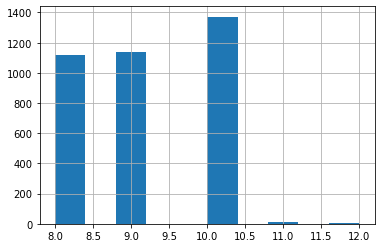

In [54]:
df.n_nurse_staff.hist(bins=10)

In [55]:
bins = [7, 8, 9, 13]
df['binned'] = pd.cut(df['n_nurse_staff'], bins, labels=['1','2','3'])

In [56]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']

trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))


for bin_, g in df.groupby('binned'):
    print(bin_)
    X_test = g[X_features]
    y_test = g[y_feature]
    X_eval, y_eval, X_, y_, X_0, y_0, X_1, y_1,_ = build_inputs(g, X_features, y_feature, test_size=0.01, X_pad=20, scaler=scaler)
    print(f"bin {bin_} Data {y_.mean()}")
    outputs = model(torch.from_numpy(X_))
    print(f"bin {bin_} Model Prediction {outputs.ge(threshold).numpy().mean()}")
    targets = torch.from_numpy(y_)
    accuracy = (outputs.data.ge(threshold) == targets).sum()/targets.shape[0]
    print(f"bin {bin_} Model Accuracy {accuracy}")

1
 train class balance 0.660054087638855
 train class balance 0.6666666865348816
bin 1 Data 0.6666666865348816
bin 1 Model Prediction 0.6666666666666666
bin 1 Model Accuracy 1.0
2
 train class balance 0.6455921530723572
 train class balance 0.6666666865348816
bin 2 Data 0.6666666865348816
bin 2 Model Prediction 0.6666666666666666
bin 2 Model Accuracy 1.0
3
 train class balance 0.6207396388053894
 train class balance 0.6428571343421936
bin 3 Data 0.6428571343421936
bin 3 Model Prediction 0.7142857142857143
bin 3 Model Accuracy 0.9285714030265808


#### APP

<AxesSubplot:>

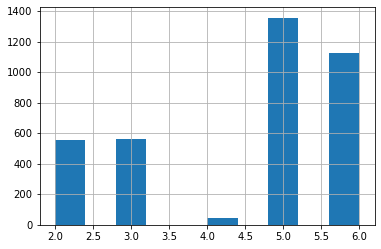

In [255]:
df.n_app_staff.hist(bins=10)

In [256]:
bins = [0, 4,5,6]
df['binned'] = pd.cut(df['n_app_staff'], bins, labels=['1','2','3'])

In [33]:
X_features = ['n_discharges', 'n_md_staff', 'n_app_staff', 'n_nurse_staff',
             'n_cm_staff', 'n_pharm_staff', 'n_bed_staff',
             'perc_transport_cases', 'perc_equipment_cases', 'perc_cm_cases', 'rounding_start']

y_feature = ['avg_discharge_before_13']

trainset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))


for bin_, g in df.groupby('binned'):
    print(bin_)
    X_test = g[X_features]
    y_test = g[y_feature]
    X_eval, y_eval, X_, y_, X_0, y_0, X_1, y_1,_ = build_inputs(g, X_features, y_feature, test_size=0.01, X_pad=20, scaler=scaler)
    print(f"bin {bin_} Data {y_.mean()}")
    outputs = model(torch.from_numpy(X_))
    print(f"bin {bin_} Model Prediction {outputs.ge(threshold).numpy().mean()}")
    targets = torch.from_numpy(y_)
    accuracy = (outputs.data.ge(threshold) == targets).sum()/targets.shape[0]
    print(f"bin {bin_} Model Accuracy {accuracy}")

1
 train class balance 0.27365729212760925
 train class balance 0.25
bin 1 Data 0.27365729212760925
bin 1 Model Prediction 0.309462915601023
bin 1 Model Accuracy 0.9462915658950806
2
 train class balance 0.6686217188835144
 train class balance 0.6363636255264282
bin 2 Data 0.6686217188835144
bin 2 Model Prediction 0.7311827956989247
bin 2 Model Accuracy 0.9042032957077026
3
 train class balance 0.7399794459342957
 train class balance 0.699999988079071
bin 3 Data 0.7399794459342957
bin 3 Model Prediction 0.8972250770811921
bin 3 Model Accuracy 0.8304213881492615
4
 train class balance 0.8355342149734497
 train class balance 0.8888888955116272
bin 4 Data 0.8355342149734497
bin 4 Model Prediction 0.9543817527010804
bin 4 Model Accuracy 0.8643457293510437
